Implementing Artificial Neural Network training process in Python
Difficulty Level : Medium
Last Updated : 22 Jan, 2022
An Artificial Neural Network (ANN) is an information processing paradigm that is inspired the brain. ANNs, like people, learn by example. An ANN is configured for a specific application, such as pattern recognition or data classification, through a learning process. Learning largely involves adjustments to the synaptic connections that exist between the neurons. 
 
 

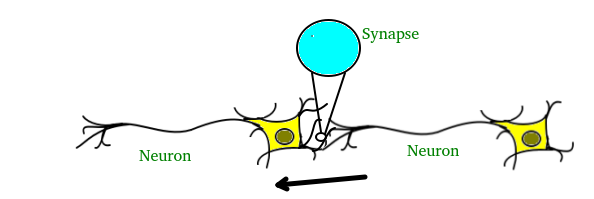

The brain consists of hundreds of billions of cells called neurons. These neurons are connected together by synapses which are nothing but the connections across which a neuron can send an impulse to another neuron. When a neuron sends an excitatory signal to another neuron, then this signal will be added to all of the other inputs of that neuron. If it exceeds a given threshold then it will cause the target neuron to fire an action signal forward — this is how the thinking process works internally.

In Computer Science, we model this process by creating “networks” on a computer using matrices. These networks can be understood as an abstraction of neurons without all the biological complexities taken into account. To keep things simple, we will just model a simple NN, with two layers capable of solving a linear classification problem.
 

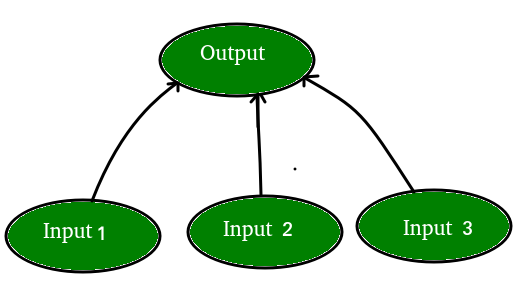

Let’s say we have a problem where we want to predict output given a set of inputs and outputs as training example like so:

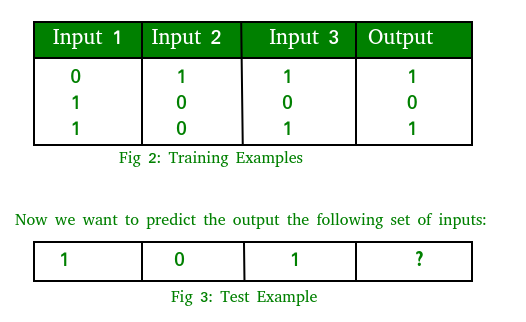

Note that the output is directly related to the third column i.e. the values of input 3 is what the output is in every training example in fig. 2. So for the test example output value should be 1.
 

The training process consists of the following steps: 

### 1.Forward Propagation: 
Take the inputs, multiply by the weights (just use random numbers as weights) 
Let Y = WiIi = W1I1+W2I2+W3I3 
Pass the result through a sigmoid formula to calculate the neuron’s output. The Sigmoid function is used to normalize the result between 0 and 1: 
1/1 + e-y

### 2.Back Propagation 
Calculate the error i.e the difference between the actual output and the expected output. Depending on the error, adjust the weights by multiplying the error with the input and again with the gradient of the Sigmoid curve: 
Weight += Error Input Output (1-Output) ,here Output (1-Output) is derivative of sigmoid curve.

Note: Repeat the whole process for a few thousand iterations.
Let’s code up the whole process in Python. We’ll be using the Numpy library to help us with all the calculations on matrices easily. You’d need to install a numpy library on your system to run the code 
Command to install numpy: 

 sudo apt -get install python-numpy

### Implementation

In [2]:
from joblib.numpy_pickle_utils import xrange

In [3]:
from numpy import *

In [4]:
class NeuralNet(object):
    
    def __init__(self):
        # Generate random number
        random.seed(1)
        
        # Assign random weights to a 3 x 1 matrix
        self.synaptic_weights = 2 * random.random((3,1))-1
    
    # sigmoid function
    def __sigmoid(self,x):
        return 1/(1 + exp(-x))
    
    # The derivative of the sigmoid function
    # This is the gradient of the sigmoid curve
    def __sigmoid_derivative(self, x):
        return x * (1-x)
    
    # Train the neural network and adjust the weights each time
    def train(self, inputs, outputs, training_iterations):
        for iteration in xrange(training_iterations):
            
            #print(iteration)
            
            
            output = self.learn(inputs)
            
            
            ## important for testing - print
            ## print(output)
            
            #Calculate the error
            error = outputs - output
            
            #print(error)
            #print(self.__sigmoid_derivative(output))
            #print(error * self.__sigmoid_derivative(output))
            
            # Adjust the weights by a factor
            factor = dot(inputs.T, error * self.__sigmoid_derivative(output))
            
            #print("factor")
            #print(factor)
            
            # adjust the weights with the factor
            self.synaptic_weights += factor
                
                
    #
    def learn(self, inputs):
        return self.__sigmoid(dot(inputs, self.synaptic_weights))

In [8]:
if __name__ == "__main__":
    # initialize 
    neural_network = NeuralNet()
    
    print("check the initial weights set")
    print(neural_network.synaptic_weights)
    
    
    
    ## Training dataset
    inputs = array([[0,1,1],[1,0,0],[1,0,1]])
    outputs = array([[1,0,1]]).T
    
    print("Print outputs value:")
    print(outputs)
    
    
    # train the neural network
    neural_network.train(inputs, outputs, 1000)
    
    # Test the neural network with a test example
    print("Predicted value for test data:")
    print(neural_network.learn(array([1,0,1])))
    
    
    print("Predicted value for test data 2:")
    print(neural_network.learn(array([0,0,1])))
    

check the initial weights set
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Print outputs value:
[[1]
 [0]
 [1]]
Predicted value for test data:
[0.96596115]
Predicted value for test data 2:
[0.99846095]


### Expected Output: 
After 10 iterations our neural network predicts the value to be 0.65980921.  It looks not good as the answer should really be 1. If we increase the number of iterations to 100, we get 0.87680541. Our network is getting smarter! Subsequently, for 10000 iterations we get 0.9897704 which is pretty close and indeed a satisfactory output.

## Rough work

In [60]:
1/(1+exp(0.5587))

0.3638483079585487

In [61]:
a = array([[1],[2],[3]])

In [45]:
a

array([[1],
       [2],
       [3]])

In [46]:
b = array([[1],[2],[3]])

In [47]:
b

array([[1],
       [2],
       [3]])

In [48]:
a*b

array([[1],
       [4],
       [9]])

In [50]:
print(0.3638*0.6362)

0.23144956
